In [453]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import xgboost as xgb

**Загрузка данных**

In [454]:
df = pd.read_csv("Medicalpremium.csv")

In [455]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [456]:
df.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [457]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


**Выбор признаков**

In [458]:
x = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

**Разделение данных на обучающую и тестовую выборки**

In [459]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

**Печать количества образцов для обучения и валидации**

In [460]:
print(
    "Using %d samples for training and %d for validation"
    % (len(x_train), len(x_test))
)

Using 739 samples for training and 247 for validation


**Создание модели**

In [461]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.mean_absolute_error])

history = model.fit(x_train, y_train, epochs=50, verbose=1)


Epoch 1/50


24/24 [==============================] - 0s 870us/step - loss: 639729024.0000 - mean_absolute_error: 24480.9453
Epoch 2/50
24/24 [==============================] - 0s 826us/step - loss: 638636992.0000 - mean_absolute_error: 24458.8965
Epoch 3/50
24/24 [==============================] - 0s 783us/step - loss: 637607168.0000 - mean_absolute_error: 24437.9570
Epoch 4/50
24/24 [==============================] - 0s 826us/step - loss: 636330816.0000 - mean_absolute_error: 24411.7559
Epoch 5/50
24/24 [==============================] - 0s 783us/step - loss: 634443008.0000 - mean_absolute_error: 24373.4902
Epoch 6/50
24/24 [==============================] - 0s 826us/step - loss: 631544832.0000 - mean_absolute_error: 24314.7090
Epoch 7/50
24/24 [==============================] - 0s 826us/step - loss: 627312128.0000 - mean_absolute_error: 24228.4414
Epoch 8/50
24/24 [==============================] - 0s 826us/step - loss: 621257536.0000 - mean_absolute_error: 24103.8535
Epoch 9/50
24/24 [=========

<Axes: >

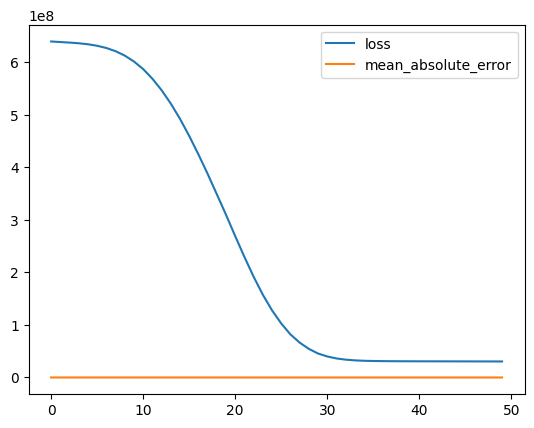

In [462]:
hist = pd.DataFrame(history.history)
hist.plot()

**Повторное обучение с оцененной скоростью обучения**

In [463]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0097), metrics=[tf.keras.metrics.mean_absolute_error])

history = model.fit(x_train, y_train, epochs=15, verbose=1)


Epoch 1/15
24/24 [==============================] - 0s 826us/step - loss: 621440640.0000 - mean_absolute_error: 24104.7578
Epoch 2/15
24/24 [==============================] - 0s 783us/step - loss: 503585728.0000 - mean_absolute_error: 21479.8477
Epoch 3/15
24/24 [==============================] - 0s 826us/step - loss: 196364960.0000 - mean_absolute_error: 12183.8838
Epoch 4/15
24/24 [==============================] - 0s 783us/step - loss: 38656224.0000 - mean_absolute_error: 4862.3892
Epoch 5/15
24/24 [==============================] - 0s 783us/step - loss: 34556604.0000 - mean_absolute_error: 4561.2612
Epoch 6/15
24/24 [==============================] - 0s 783us/step - loss: 33494948.0000 - mean_absolute_error: 4445.4292
Epoch 7/15
24/24 [==============================] - 0s 783us/step - loss: 32891686.0000 - mean_absolute_error: 4409.4751
Epoch 8/15
24/24 [==============================] - 0s 783us/step - loss: 32340924.0000 - mean_absolute_error: 4363.3770
Epoch 9/15
24/24 [========

In [464]:
model.save("model_Medicalpremium.h5")

model1 = keras.models.load_model("model_Medicalpremium.h5")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Предсказание на тестовой выборке**

In [465]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 858us/step


**Создание графика и Добавление линии идентичности (предсказания = истинные значения)**

**На этом графике точки, которые ближе к красной линии, соответствуют предсказаниям, которые ближе к истинным значениям**

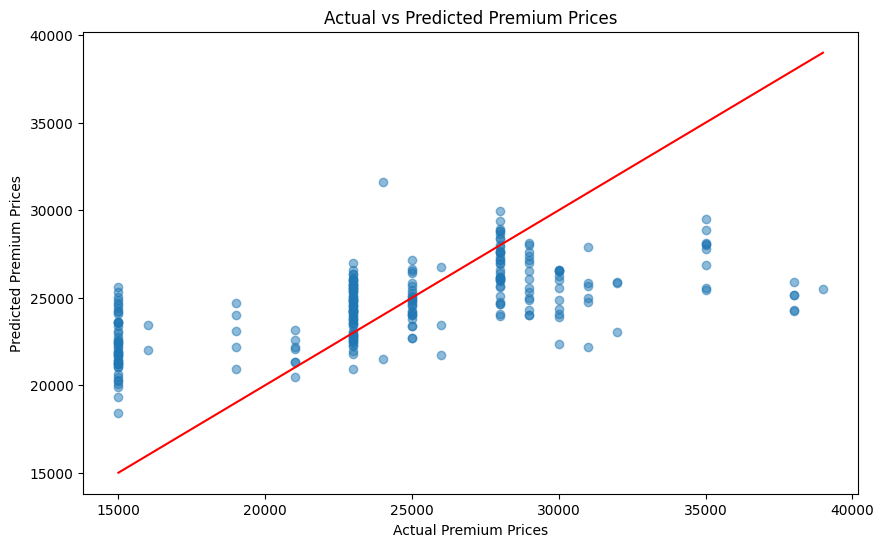

In [466]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Premium Prices")
plt.ylabel("Predicted Premium Prices")
plt.title("Actual vs Predicted Premium Prices")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

**Вычисления метрик регрессии**

In [467]:
def regression_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R^2 Score: {r2}"  

regression_metrics(y_test, y_pred)

'Mean Squared Error: 23468298.26448337, Mean Absolute Error: 3655.913287575911, R^2 Score: 0.32218035796625055'

In [468]:
# Получение предсказания модели на одном образце из тестового набора данных
test = model.predict(x_test.iloc[[10]])

# Вывод предсказания
test

# Вывод истинного значения
y_test.iloc[[10]]

1/1 [==============================] - 0s 19ms/step


417    23000
Name: PremiumPrice, dtype: int64

**Создание и обучение модели**

In [469]:
model_xgbr = xgb.XGBRegressor(verbosity=0) 
model_xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Предсказание на тестовой выборке**

In [470]:
y_pred_xgbr = model_xgbr.predict(x_test)

**Вычисление метрик**

In [471]:
mse = mean_squared_error(y_test, y_pred_xgbr)
mae = mean_absolute_error(y_test, y_pred_xgbr)
r2 = r2_score(y_test, y_pred_xgbr)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 10681703.6347522
Mean Absolute Error: 1483.0763339764676
R^2 Score: 0.6914872798861744
